In [1]:
# !pip install -U -q imblearn
import os, types
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Authenticating Google Drive and importing neccessary dataset

In [2]:
data = pd.read_csv('heart_2020_oversampled.csv')
data.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,3.0,30.0,5.0,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes,No
1,20.34,0.0,0.0,7.0,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No,No
2,26.58,20.0,30.0,8.0,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No,No
3,24.21,0.0,0.0,6.0,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes,No
4,23.71,28.0,0.0,8.0,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No,No


## 1. Extracting Numeric Data and doing EDA on the data



In [3]:
X, y = data.iloc[:, :-1],data.iloc[:, -1]
y = y.map({'No':0, 'Yes':1})
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
y.shape

(584844,)

In [5]:
numeric_columns = data._get_numeric_data().columns
categorical_columns = data.select_dtypes(include=['object']).columns[:-1]

In [6]:
categories_list = [['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes'], ['Male', 'Female'], ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Hispanic', 'Other'], ['No', 'No, borderline diabetes', 'Yes (during pregnancy)', 'Yes'],
['No', 'Yes'], ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'], ['No', 'Yes'], ['No', 'Yes'], ['No', 'Yes']]

In [7]:
preprocessing = ColumnTransformer(
    [('norm', StandardScaler(), numeric_columns),
    ('categor', OrdinalEncoder(categories=categories_list), categorical_columns)])

classifier = RandomForestClassifier()

model = Pipeline([('preprocessing', preprocessing),('classifier', classifier)])

In [8]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('norm', StandardScaler(),
                                                  Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')),
                                                 ('categor',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                   

In [9]:
pred = model.predict(X_test)

In [10]:
print("Model classification report: ")
print(metrics.classification_report(y_test, pred))

Model classification report: 
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     72921
           1       0.90      0.92      0.91     73290

    accuracy                           0.91    146211
   macro avg       0.91      0.91      0.91    146211
weighted avg       0.91      0.91      0.91    146211



In [11]:
prob = model.predict_proba(X_test)
prob

array([[0.05, 0.95],
       [0.01, 0.99],
       [0.18, 0.82],
       ...,
       [1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ]])

In [12]:
prob[:, 0]

array([0.05, 0.01, 0.18, ..., 1.  , 0.98, 1.  ])

In [13]:
metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])

(array([0.        , 0.00239986, 0.00239986, ..., 0.77662128, 0.7766487 ,
        1.        ]),
 array([0.        , 0.14656843, 0.14659572, ..., 0.99798062, 0.99798062,
        1.        ]),
 array([2.00000000e+00, 1.00000000e+00, 9.97500000e-01, ...,
        1.66666667e-03, 1.25000000e-03, 0.00000000e+00]))

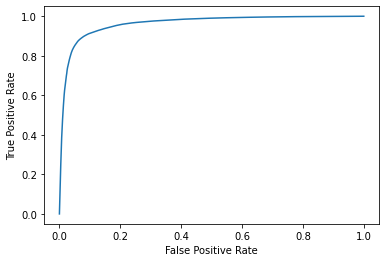

In [14]:
fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

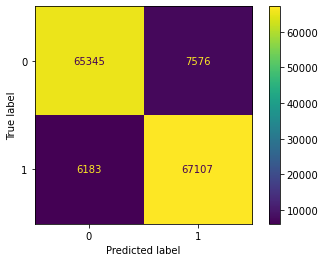

In [15]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,pred)

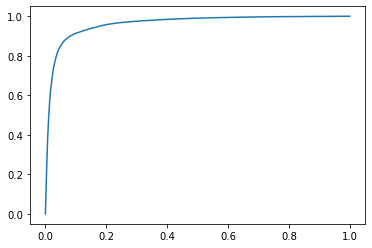

In [16]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

In [17]:
numeric_data = data._get_numeric_data()
numeric_columns = numeric_data.columns
scaler = StandardScaler()
scaler.fit(numeric_data)
numeric_data[numeric_data.columns] = scaler.transform(numeric_data)

In [18]:
numeric_data = numeric_data.join(data['HeartDisease'])
numeric_data.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease
0,-1.946142,-0.233006,3.042011,-1.372844,No
1,-1.348068,-0.534470,-0.489822,-0.074963,No
2,-0.350212,1.475289,3.042011,0.573977,No
3,-0.729205,-0.534470,-0.489822,-0.723903,No
4,-0.809162,2.279192,-0.489822,0.573977,No


In [23]:
model_fit = model.fit(X_train, y_train)

In [28]:
model_fit._final_estimator.feature_importances_

array([0.23210397, 0.10312039, 0.07656556, 0.11615398, 0.0171683 ,
       0.01065637, 0.00910354, 0.01973185, 0.02193635, 0.1696587 ,
       0.02675438, 0.03792504, 0.01951351, 0.11010077, 0.01135185,
       0.00701213, 0.0111433 ])

## 2. Extracting categorical data and doing EDA

In [24]:
categorical_data = data.select_dtypes(include=['object'])
categorical_columns = categorical_data.columns
categorical_data.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [17]:
def encode_data(data: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    data_copy = data.copy()
    columns = data.columns.to_list()
    for column in columns:
        data_copy[column] = data[column].replace(all_maps[column+'_map'])
    return data_copy

In [28]:
df_encoded = encode_data(categorical_data)

In [ ]:
df_encoded = df_encoded.join(categorical_data['HeartDisease'])

In [27]:
print(numeric_columns, categorical_columns)

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object') Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


## 3. Trying to balance the imbalanced data

In [30]:
data_copy = numeric_data.iloc[:, :-1].join(df_encoded)
data_copy.head()

,BMI,PhysicalHealth,MentalHealth,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,-1.844750,-0.046751,3.281069,0,1,0,0,0,0,7,0,3,1,3,1,0,1
1,-1.256338,-0.424070,-0.490039,0,0,0,1,0,0,12,0,0,1,3,0,0,0
2,-0.274603,2.091388,3.281069,0,1,0,0,0,1,9,0,3,1,1,1,0,0
3,-0.647473,-0.424070,-0.490039,0,0,0,0,0,0,11,0,0,0,2,0,0,1
4,-0.726138,3.097572,-0.490039,0,0,0,0,1,0,4,0,0,1,3,0,0,0


In [21]:
smote = SMOTE()
X,y = smote.fit_resample(data_copy.iloc[:, :-1], data_copy.iloc[:, -1])
data_oversampled = X.join(y)
data_oversampled.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,-1.844750,-0.046751,3.281069,-1.460354,1,0,0,0,0,7,0,3,1,3,1,0,1,No
1,-1.256338,-0.424070,-0.490039,-0.067601,0,0,1,0,0,12,0,0,1,3,0,0,0,No
2,-0.274603,2.091388,3.281069,0.628776,1,0,0,0,1,9,0,3,1,1,1,0,0,No
3,-0.647473,-0.424070,-0.490039,-0.763977,0,0,0,0,0,11,0,0,0,2,0,0,1,No
4,-0.726138,3.097572,-0.490039,0.628776,0,0,0,1,0,4,0,0,1,3,0,0,0,No


In [22]:
data_oversampled.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,-1.844750,-0.046751,3.281069,-1.460354,1,0,0,0,0,7,0,3,1,3,1,0,1,No
1,-1.256338,-0.424070,-0.490039,-0.067601,0,0,1,0,0,12,0,0,1,3,0,0,0,No
2,-0.274603,2.091388,3.281069,0.628776,1,0,0,0,1,9,0,3,1,1,1,0,0,No
3,-0.647473,-0.424070,-0.490039,-0.763977,0,0,0,0,0,11,0,0,0,2,0,0,1,No
4,-0.726138,3.097572,-0.490039,0.628776,0,0,0,1,0,4,0,0,1,3,0,0,0,No


In [25]:
before_sampling = list(Counter(data_copy['HeartDisease']).items())
after_sampling = list(Counter(data_oversampled['HeartDisease']).items())

In [26]:
print("Before Oversampling \t %s: %d, %s: %d" %(before_sampling[0][0], before_sampling[0][1], before_sampling[1][0], before_sampling[1][1]))
print("After Oversampling \t %s: %d, %s: %d" %(after_sampling[0][0], after_sampling[0][1], after_sampling[1][0], after_sampling[1][1]))

Before Oversampling 	 No: 292422, Yes: 27373
After Oversampling 	 No: 292422, Yes: 292422


In [157]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_copy.iloc[:, :-1], data_copy.iloc[:, -1])
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_oversampled.iloc[:, :-1], data_oversampled.iloc[:, -1])

In [19]:
from sklearn.neural_network import MLPClassifier

clf1 = MLPClassifier()
clf2 = MLPClassifier()

clf1.fit(X_train_1, y_train_1)
clf2.fit(X_train_2, y_train_2)

pred1 = clf1.predict(X_test_1)
pred2 = clf2.predict(X_test_2)

print("Accuracy 1:", accuracy_score(y_test_1, pred1))
print("Accuracy 2:", accuracy_score(y_test_2, pred2))

print("Confusion 1:", confusion_matrix(y_test_1, pred1))
print("Confusion 2:", confusion_matrix(y_test_2, pred2))

Accuracy 1: 0.9143078712679333
Accuracy 2: 0.7832174049832092
Confusion 1: [[72347   648]
 [ 6203   751]]
Confusion 2: [[55294 17677]
 [14019 59221]]
